In [1]:
import os
import geopandas as gpd
import pandas as pd
import folium

In [2]:
county_path = './data/border_data/us_border_county/us-border-counties.shp'

county_gdf = gpd.read_file(county_path, geometry='geometry')

In [3]:
county_gdf.head(5)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,48,215,01383893,48215,Hidalgo,Hidalgo County,06,H1,G4020,365,32580,None,A,4068758841,30739605,+26.3963839,-098.1809900,"POLYGON ((-98.38668 26.15797, -98.38677 26.158..."
1,04,027,00023901,04027,Yuma,Yuma County,06,H1,G4020,None,49740,None,A,14280774789,13253159,+32.7739424,-113.9109050,"POLYGON ((-114.79193 32.56682, -114.79186 32.5..."
2,48,271,01383921,48271,Kinney,Kinney County,06,H1,G4020,None,None,None,A,3523765247,11885327,+29.3470865,-100.4177003,"POLYGON ((-100.79705 29.23559, -100.79591 29.2..."
3,06,073,00277301,06073,San Diego,San Diego County,06,H1,G4020,None,41740,None,A,10904455257,817317026,+33.0236041,-116.7761174,"POLYGON ((-117.43743 33.17953, -117.44954 33.1..."
4,48,323,01383944,48323,Maverick,Maverick County,06,H1,G4020,None,20580,None,A,3313818748,31872416,+28.7297873,-100.3166780,"POLYGON ((-100.54818 28.82606, -100.54890 28.8..."


In [4]:
county_gdf.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object')

<Axes: >

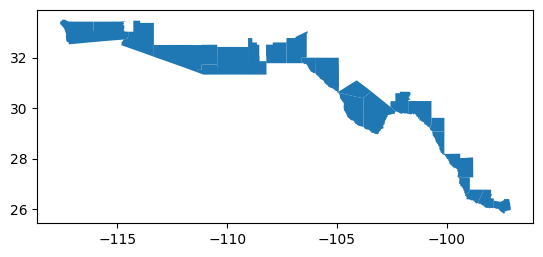

In [5]:
county_gdf.plot()

In [6]:
zcta_input = './data/border_data/us_border_zcta/us_border_zcta_acs.shp'

zcta_gdf = gpd.read_file(zcta_input, geometry='geometry')

In [7]:
zcta_gdf.head()

,TARGET_FID,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,...,Pop25Old_5,Pop25Old_6,Pop25Old_7,PopDisabil,MedianIcom,Foreignbor,Ratio_4_mo,HouseNum,AveHouseSi,geometry
0,628,85614,85614,B5,G6350,S,3.414899e+08,39434.0,+31.8113004,-110.9310852,...,1905.0,4783.0,3145.0,5933.0,79385.0,2000.0,4.2,13390.0,1.77,"POLYGON ((-111.08011 31.90562, -111.08010 31.9..."
1,629,85736,85736,B5,G6350,S,1.098957e+09,51148.0,+31.8708859,-111.3669757,...,236.0,225.0,86.0,896.0,69332.0,217.0,26.7,1762.0,2.46,"POLYGON ((-111.60529 31.89399, -111.60517 31.8..."
2,1482,85713,85713,B5,G6350,S,6.172695e+07,39286.0,+32.1945703,-111.0149950,...,2057.0,3532.0,1569.0,6398.0,56451.0,9161.0,28.2,17062.0,2.61,"POLYGON ((-111.13240 32.21789, -111.13221 32.2..."
3,1498,85622,85622,B5,G6350,S,1.997906e+08,0.0,+31.8030040,-111.0910512,...,430.0,1656.0,893.0,1244.0,87199.0,654.0,1.1,3579.0,1.72,"POLYGON ((-111.17595 31.79494, -111.17591 31.7..."
4,1500,85706,85706,B5,G6350,S,3.396531e+07,0.0,+32.1478277,-110.9353676,...,1917.0,2185.0,592.0,7818.0,47586.0,14759.0,39.3,18533.0,3.12,"POLYGON ((-110.99391 32.14976, -110.99386 32.1..."


In [8]:
zcta_gdf.shape

(358, 78)

In [9]:
zipcode_gdf = zcta_gdf['Zipcode']

In [10]:
zipcode_gdf.to_csv('./data/output/zipcode.csv')

In [51]:
# zcta_gdf.explore(tooltip=['STATEFP', 'NAME', 'Zipcode'])

In [12]:
zcta_gdf['NAME'].value_counts()

NAME
San Diego     124
Pima           53
Hidalgo        36
Doña Ana       29
El Paso        22
Cochise        19
Yuma           15
Imperial       11
Cameron        10
Webb            8
Presidio        7
Hudspeth        5
Kinney          4
Val Verde       4
Starr           4
Brewster        2
Terrell         2
Luna            1
Santa Cruz      1
Zapata          1
Name: count, dtype: int64

In [13]:
zipcodes = zcta_gdf['NAME'].count()

In [14]:
f'There are {zipcodes} zipcodes areas in this region.'

'There are 358 zipcodes areas in this region.'

In [15]:
zipcodes_per_county = zcta_gdf['NAME'].value_counts()

In [16]:
zipcodes_per_county.to_csv('./data/output/zipcodes_per_county.csv')

In [52]:
# m = county_gdf.explore(tooltip=['NAME'], name='Border Counties')
# m = zcta_gdf.explore(m=m, color="green", tooltip=['Zipcode', 'STATEFP'], name='Zip codes')

# folium.LayerControl().add_to(m)

In [53]:
# m

In [19]:
m.save('./data/output/counties.html')

In [20]:
zcta_gdf.columns

Index(['TARGET_FID', 'ZCTA5CE20', 'GEOID20', 'CLASSFP20', 'MTFCC20',
       'FUNCSTAT20', 'ALAND20', 'AWATER20', 'INTPTLAT20', 'INTPTLON20',
       'STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'Shape_Leng', 'Shape_Area', 'Zipcode',
       'TotalPop', 'Male', 'Female', 'White', 'Black', 'Asian', 'AmericanIn',
       'NativeHawa', 'OtherRaceO', 'TotalHispa', 'NonHispWhi', 'NonHispBla',
       'NonHispAsi', 'Householdw', 'HouseHol_1', 'Professina', 'Armedforce',
       'Married', 'Unemployed', 'PopPoverty', 'PopBelowPo', 'PopUninsur',
       'Pop5andOld', 'Pop5andO_1', 'Pop5andO_2', 'Pop5andO_3', 'Pop5andO_4',
       'PopAge0_4', 'PopAge5_14', 'PopAge15_2', 'PopAge25_4', 'PopAge45_6',
       'PopAge65', 'Pop25Older', 'Pop25Old_1', 'Pop25Old_2', 'Pop25Old_3',
       'Pop25Old_4', 'Pop25Old_5', 'Pop25Old_6', 'Pop25Old_7', 'PopDisabil',
       'Me

In [21]:
zcta_gdf.columns.value_counts()

TARGET_FID    1
PopPoverty    1
Pop5andO_4    1
Pop5andO_3    1
Pop5andO_2    1
             ..
INTPTLAT      1
AWATER        1
ALAND         1
FUNCSTAT      1
geometry      1
Name: count, Length: 78, dtype: int64

In [22]:
columns_to_remove = zcta_gdf.columns[30:76]
zcta_gdf = zcta_gdf.drop(columns=columns_to_remove)

In [23]:
zcta_gdf = zcta_gdf.drop(columns=['AveHouseSi'])

In [24]:
zcta_gdf = zcta_gdf.drop(columns=['Shape_Leng', 'Shape_Area'])

In [25]:
zcta_gdf.columns

Index(['TARGET_FID', 'ZCTA5CE20', 'GEOID20', 'CLASSFP20', 'MTFCC20',
       'FUNCSTAT20', 'ALAND20', 'AWATER20', 'INTPTLAT20', 'INTPTLON20',
       'STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'Zipcode', 'geometry'],
      dtype='object')

In [26]:
zcta_gdf.to_file('./data/output/zcta_gdf.shp')

In [27]:
acs_path = './data/acs_data/ACS5_2022.csv'

acs_df = pd.read_csv(acs_path)

In [28]:
acs_df

,Unnamed: 0,GEO_ID,GEOCOMP,NAME,Total_Population,Male_Total_Population,Female_Total_Population,White_Total_Population,Black_AfricanAmerican_Total_Population,Asian_Total_Population,...,College_nodegree_EducationalAttainment_more25,Associate_degree_EducationalAttainment_more25,Bachelor_degree_EducationalAttainment_more25,Master_degree_EducationalAttainment_more25,Disability_Under19,Disability_19_64,Disability_Over65,Median_family_income,Place_of_Birth_ Nativity_CitizenshipStatus,Average_Household_Size
0,0,860Z200US00601,0,ZCTA5 00601,16834,8337,8497,14170,348,23,...,778,1622,1773,237,113,1339,962,19628,47,3.140000e+00
1,1,860Z200US00602,0,ZCTA5 00602,37642,18405,19237,18479,555,48,...,2015,3377,4767,1181,367,5233,4928,24126,270,2.940000e+00
2,2,860Z200US00603,0,ZCTA5 00603,49075,23813,25262,36216,1719,28,...,3702,3041,6001,2132,582,5837,6030,24062,628,2.450000e+00
3,3,860Z200US00606,0,ZCTA5 00606,5590,2723,2867,3721,9,0,...,388,186,287,129,46,173,239,21439,48,2.860000e+00
4,4,860Z200US00610,0,ZCTA5 00610,25542,12317,13225,11182,576,0,...,1255,2467,3199,846,318,2497,3576,26914,141,2.890000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33769,33769,860Z200US99923,0,ZCTA5 99923,25,9,16,25,0,0,...,0,0,16,0,0,0,9,-666666666,0,-6.666667e+08
33770,33770,860Z200US99925,0,ZCTA5 99925,920,525,395,413,4,7,...,150,53,86,28,5,93,95,91042,29,2.420000e+00
33771,33771,860Z200US99926,0,ZCTA5 99926,1465,822,643,108,5,14,...,280,125,43,40,47,176,139,95278,38,3.260000e+00
33772,33772,860Z200US99927,0,ZCTA5 99927,14,0,14,14,0,0,...,0,0,0,0,0,14,0,-666666666,14,-6.666667e+08


In [29]:
acs_df.columns.values

array(['Unnamed: 0', 'GEO_ID', 'GEOCOMP', 'NAME', 'Total_Population',
       'Male_Total_Population', 'Female_Total_Population',
       'White_Total_Population', 'Black_AfricanAmerican_Total_Population',
       'Asian_Total_Population',
       'AmericanIndian_AlaskaNative_Total_Population',
       'NativeHawaiian_OtherPacificIslander_Total_Population',
       'Other_Race_Total_Population', 'Hispanic_Latino_Total_Population',
       'Married_Male', 'Married_Female',
       'Total_households_PublicAssistance', 'Poverty_Status',
       'Income_below_PovertyLevel', 'No_HealthInsurance_Coverage_less19',
       'No_HealthInsurance_Coverage_19_34',
       'No_HealthInsurance_Coverage_35_64',
       'No_HealthInsurance_Coverage_more65',
       'Total_households_Children_Below18', 'Male_Professional',
       'Female_Professional', 'ArmedForces_LaborForce',
       'Unemployed_LaborForce', 'Total_English_Spoken_Home',
       'English_Spoken_Home_15_17', 'English_Spoken_Home_18_64',
       'Englis

In [30]:
zcta_gdf['Zipcode'] = zcta_gdf['Zipcode'].astype('int64')

In [31]:
zcta_gdf.to_crs(epsg='4236')

zcta_gdf.head(2)

,TARGET_FID,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,...,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Zipcode,geometry
0,628,85614,85614,B5,G6350,S,3.414899e+08,39434.0,+31.8113004,-110.9310852,...,536,46060,None,A,2.379860e+10,5112018.0,+32.1280380,-111.7836574,85614,"POLYGON ((-111.08011 31.90562, -111.08010 31.9..."
1,629,85736,85736,B5,G6350,S,1.098957e+09,51148.0,+31.8708859,-111.3669757,...,536,46060,None,A,2.379860e+10,5112018.0,+32.1280380,-111.7836574,85736,"POLYGON ((-111.60529 31.89399, -111.60517 31.8..."


In [32]:
acs_df['zip code tabulation area'].astype(int)

0          601
1          602
2          603
3          606
4          610
         ...  
33769    99923
33770    99925
33771    99926
33772    99927
33773    99929
Name: zip code tabulation area, Length: 33774, dtype: int64

In [33]:
acs_data = zcta_gdf.reset_index(drop=True).merge(acs_df.reset_index(drop=True), left_on='Zipcode', right_on='zip code tabulation area', how='inner').reset_index(drop=True)

In [34]:
# acs_data.explore()

In [35]:
county_gdf.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object')

In [36]:
zcta_gdf.columns

Index(['TARGET_FID', 'ZCTA5CE20', 'GEOID20', 'CLASSFP20', 'MTFCC20',
       'FUNCSTAT20', 'ALAND20', 'AWATER20', 'INTPTLAT20', 'INTPTLON20',
       'STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'Zipcode', 'geometry'],
      dtype='object')

In [54]:
# a = county_gdf.explore(tooltip=['NAME'], name='Border Counties')
# a = acs_data.explore(m=a, color="green", tooltip=['Zipcode', 'STATEFP'], name='Zip codes')

# folium.LayerControl().add_to(a)

In [55]:
# a

In [39]:
# a.save('./data/output/counties.')

In [40]:
acs_data.columns.values

array(['TARGET_FID', 'ZCTA5CE20', 'GEOID20', 'CLASSFP20', 'MTFCC20',
       'FUNCSTAT20', 'ALAND20', 'AWATER20', 'INTPTLAT20', 'INTPTLON20',
       'STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME_x', 'NAMELSAD',
       'LSAD', 'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'Zipcode',
       'geometry', 'Unnamed: 0', 'GEO_ID', 'GEOCOMP', 'NAME_y',
       'Total_Population', 'Male_Total_Population',
       'Female_Total_Population', 'White_Total_Population',
       'Black_AfricanAmerican_Total_Population', 'Asian_Total_Population',
       'AmericanIndian_AlaskaNative_Total_Population',
       'NativeHawaiian_OtherPacificIslander_Total_Population',
       'Other_Race_Total_Population', 'Hispanic_Latino_Total_Population',
       'Married_Male', 'Married_Female',
       'Total_households_PublicAssistance', 'Poverty_Status',
       'Income_below_PovertyLevel', 'No_HealthInsurance_Coverage_less19',
       'No_HealthInsurance_

In [41]:
acs_data = acs_data.drop(columns=['Unnamed: 0'])

In [42]:
acs_data.columns.values

array(['TARGET_FID', 'ZCTA5CE20', 'GEOID20', 'CLASSFP20', 'MTFCC20',
       'FUNCSTAT20', 'ALAND20', 'AWATER20', 'INTPTLAT20', 'INTPTLON20',
       'STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME_x', 'NAMELSAD',
       'LSAD', 'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'Zipcode',
       'geometry', 'GEO_ID', 'GEOCOMP', 'NAME_y', 'Total_Population',
       'Male_Total_Population', 'Female_Total_Population',
       'White_Total_Population', 'Black_AfricanAmerican_Total_Population',
       'Asian_Total_Population',
       'AmericanIndian_AlaskaNative_Total_Population',
       'NativeHawaiian_OtherPacificIslander_Total_Population',
       'Other_Race_Total_Population', 'Hispanic_Latino_Total_Population',
       'Married_Male', 'Married_Female',
       'Total_households_PublicAssistance', 'Poverty_Status',
       'Income_below_PovertyLevel', 'No_HealthInsurance_Coverage_less19',
       'No_HealthInsurance_Coverage_19_34

In [43]:
acs_data.dtypes.values

array([dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('float64'), dtype('float64'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'),
       dtype('float64'), dtype('O'), dtype('O'), dtype('int64'),
       <geopandas.array.GeometryDtype object at 0x14145c0d0>, dtype('O'),
       dtype('int64'), dtype('O'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), 

In [44]:
acs_data

,TARGET_FID,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,...,College_nodegree_EducationalAttainment_more25,Associate_degree_EducationalAttainment_more25,Bachelor_degree_EducationalAttainment_more25,Master_degree_EducationalAttainment_more25,Disability_Under19,Disability_19_64,Disability_Over65,Median_family_income,Place_of_Birth_ Nativity_CitizenshipStatus,Average_Household_Size
0,628,85614,85614,B5,G6350,S,3.414899e+08,39434.0,+31.8113004,-110.9310852,...,3332,1905,4783,3145,0,865,5068,79385,2000,1.770000e+00
1,629,85736,85736,B5,G6350,S,1.098957e+09,51148.0,+31.8708859,-111.3669757,...,825,236,225,86,113,390,393,69332,217,2.460000e+00
2,1482,85713,85713,B5,G6350,S,6.172695e+07,39286.0,+32.1945703,-111.0149950,...,5171,2057,3532,1569,686,3115,2597,56451,9161,2.610000e+00
3,1498,85622,85622,B5,G6350,S,1.997906e+08,0.0,+31.8030040,-111.0910512,...,812,430,1656,893,0,73,1171,87199,654,1.720000e+00
4,1500,85706,85706,B5,G6350,S,3.396531e+07,0.0,+32.1478277,-110.9353676,...,4997,1917,2185,592,1114,3951,2753,47586,14759,3.120000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,33708,78599,78599,B5,G6350,S,6.869384e+07,189271.0,+26.2170044,-097.9879522,...,2704,734,2534,605,740,1658,1382,59453,7293,4.030000e+00
354,33749,79832,79832,B5,G6350,S,3.208580e+05,0.0,+30.3632400,-103.6492467,...,11,0,0,0,0,7,0,-666666666,11,-6.666667e+08
355,33754,78547,78547,B5,G6350,S,4.869465e+06,18298.0,+26.3041868,-098.6964026,...,0,0,39,0,0,39,0,-666666666,226,2.980000e+00
356,33757,78540,78540,B5,G6350,S,2.011473e+07,0.0,+26.5490808,-097.9916460,...,0,0,0,0,0,0,0,-666666666,0,-6.666667e+08


In [45]:
pd.options.display.float_format = '{:.0f}'.format

In [46]:
acs_data.shape

(358, 147)

In [47]:
# acs_data.to_file('./data/output/acs_data.shp')

In [48]:
# acs_data.to_csv('./data/output/acs_filter.csv')

In [56]:
# acs_data.explore()

In [50]:
acs_data

,TARGET_FID,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,...,College_nodegree_EducationalAttainment_more25,Associate_degree_EducationalAttainment_more25,Bachelor_degree_EducationalAttainment_more25,Master_degree_EducationalAttainment_more25,Disability_Under19,Disability_19_64,Disability_Over65,Median_family_income,Place_of_Birth_ Nativity_CitizenshipStatus,Average_Household_Size
0,628,85614,85614,B5,G6350,S,341489920,39434,+31.8113004,-110.9310852,...,3332,1905,4783,3145,0,865,5068,79385,2000,2
1,629,85736,85736,B5,G6350,S,1098957378,51148,+31.8708859,-111.3669757,...,825,236,225,86,113,390,393,69332,217,2
2,1482,85713,85713,B5,G6350,S,61726947,39286,+32.1945703,-111.0149950,...,5171,2057,3532,1569,686,3115,2597,56451,9161,3
3,1498,85622,85622,B5,G6350,S,199790629,0,+31.8030040,-111.0910512,...,812,430,1656,893,0,73,1171,87199,654,2
4,1500,85706,85706,B5,G6350,S,33965306,0,+32.1478277,-110.9353676,...,4997,1917,2185,592,1114,3951,2753,47586,14759,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,33708,78599,78599,B5,G6350,S,68693841,189271,+26.2170044,-097.9879522,...,2704,734,2534,605,740,1658,1382,59453,7293,4
354,33749,79832,79832,B5,G6350,S,320858,0,+30.3632400,-103.6492467,...,11,0,0,0,0,7,0,-666666666,11,-666666666
355,33754,78547,78547,B5,G6350,S,4869465,18298,+26.3041868,-098.6964026,...,0,0,39,0,0,39,0,-666666666,226,3
356,33757,78540,78540,B5,G6350,S,20114728,0,+26.5490808,-097.9916460,...,0,0,0,0,0,0,0,-666666666,0,-666666666
